In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
%matplotlib inline

In [2]:
df=pd.read_csv('df_wine_clean.csv')
df['vintage'] = df['vintage'].astype(float)
df['price']=df['price'].astype(float)
df['alcohol']=df['alcohol'].astype(float)
df


,Name,type,price,vintage,alcohol,bottle size,country,region,grapespecies,producer,Text wine
0,Alto Molino Malbec Piattelli Vineyards,1.0,10.95,2021.0,14.0,75.0,8,10,5,Piattelli Vineyards,"Alto Molino Malbec, Piattelli Vineyards - An a..."
1,Alto Molino Torrontes Piattelli Vineyards,2.0,10.89,2021.0,13.5,75.0,8,10,9,Piattelli Vineyards,"Alto Molino Torrontes, Piattelli Vineyards - A..."
2,Amauta Absoluto Torrontes,2.0,8.95,2021.0,12.5,75.0,8,10,9,El Porvenir De Cafayate,Amauta Absoluto Torrontes - Bright and appeali...
3,Piattelli Vineyards Grand Malbec,1.0,16.99,2019.0,14.0,75.0,8,10,5,Piattelli Vineyards,Piattelli Vineyards Grand Malbec - A rich and ...
4,Piattelli Vineyards Premium Malbec,1.0,13.29,2020.0,14.0,75.0,8,10,5,Piattelli Vineyards,Piattelli Vineyards Premium Malbec - A strikin...
...,...,...,...,...,...,...,...,...,...,...,...
2871,Joel Gott 815 Cabernet Sauvignon,1.0,16.59,2018.0,14.0,75.0,7,10,9,Joel Gott,Vistalba Corte B Bodega - Vistalba Manually ha...
2872,Ironstone Petite Sirah,1.0,11.99,2019.0,13.5,75.0,7,10,9,Kautz,"Vallet Freres, Bourgogne Blanc - This classic ..."
2873,Ironstone Old Vine Zinfandel,1.0,13.49,2018.0,14.5,75.0,7,10,9,Kautz,Vallet Freres Auxey Duresses Blanc - This Auxe...
2874,Ironstone Merlot,1.0,12.79,2017.0,13.5,75.0,7,10,9,Kautz,St Veran Domaine Jean Thomas - Clear and brigh...


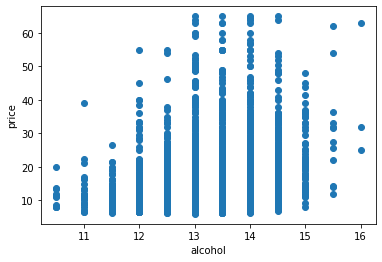

0.2379419800050336

In [3]:
plt.scatter(df['alcohol'], df['price'])
plt.xlabel('alcohol')
plt.ylabel('price')
plt.show()
df['alcohol'].corr(df['price'])

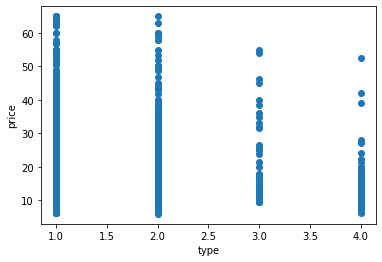

-0.1381371840686246

In [4]:
plt.scatter(df['type'], df['price'])
plt.xlabel('type')
plt.ylabel('price')
plt.show()
df['type'].corr(df['price'])

In [5]:
ct1 = pd.crosstab(df['price'], df['alcohol'])
chi2_contingency(ct1)

(3945.9376142444207,
 7.266175584715457e-09,
 3454,
 array([[0.00347705, 0.00869263, 0.02399166, ..., 0.02225313, 0.00417246,
         0.00104312],
        [0.00347705, 0.00869263, 0.02399166, ..., 0.02225313, 0.00417246,
         0.00104312],
        [0.01043115, 0.02607789, 0.07197497, ..., 0.06675939, 0.01251739,
         0.00312935],
        ...,
        [0.00347705, 0.00869263, 0.02399166, ..., 0.02225313, 0.00417246,
         0.00104312],
        [0.01043115, 0.02607789, 0.07197497, ..., 0.06675939, 0.01251739,
         0.00312935],
        [0.00347705, 0.00869263, 0.02399166, ..., 0.02225313, 0.00417246,
         0.00104312]]))

In [6]:
ct2 = pd.crosstab(df['type'], df['price'])
chi2_contingency(ct2)

(1085.1759544826168,
 0.0007886645792523973,
 942,
 array([[0.51460362, 0.51460362, 1.54381085, ..., 0.51460362, 1.54381085,
         0.51460362],
        [0.41342142, 0.41342142, 1.24026426, ..., 0.41342142, 1.24026426,
         0.41342142],
        [0.01668985, 0.01668985, 0.05006954, ..., 0.01668985, 0.05006954,
         0.01668985],
        [0.05528512, 0.05528512, 0.16585535, ..., 0.05528512, 0.16585535,
         0.05528512]]))

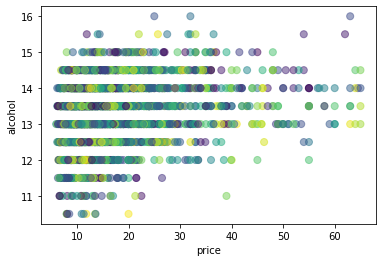

0.23794198000503364

In [8]:
plt.xlabel('price')
plt.ylabel('alcohol')
x = df['price']
y = df['alcohol']
colors = np.random.rand(2876)
area = (50)
plt.scatter(x,y, s=area, c=colors, alpha=0.5)
plt.show()
df['price'].corr(df['alcohol'])

#עמודת נקודות 

<AxesSubplot:xlabel='price'>

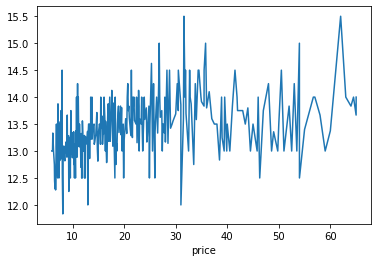

In [9]:
multi_plot = df.groupby(['price']).mean()['alcohol']
multi_plot.plot()

<AxesSubplot:xlabel='price'>

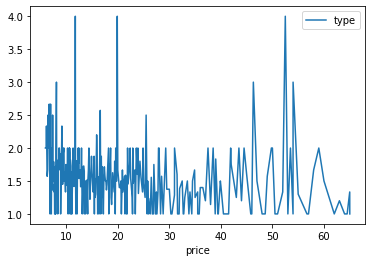

In [10]:
multi_plot = df.groupby(['price']).mean()[['type']]
multi_plot.plot()

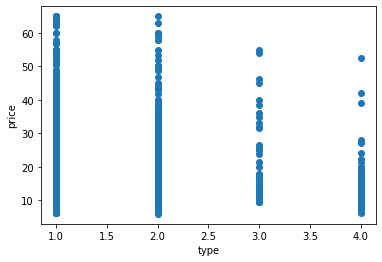

-0.1381371840686246

In [11]:
plt.scatter(df['type'], df['price'])
plt.xlabel('type')
plt.ylabel('price')
plt.show()
df['type'].corr(df['price'])

<AxesSubplot:xlabel='alcohol', ylabel='Count'>

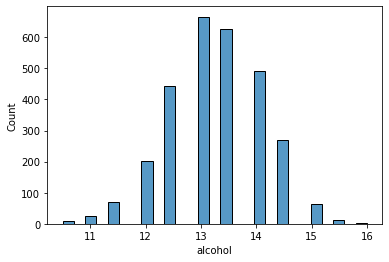

In [12]:
import seaborn as sns

sns.histplot(data=df['alcohol'])

<AxesSubplot:xlabel='price', ylabel='Count'>

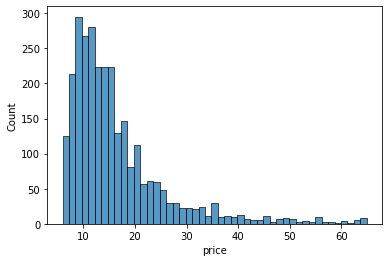

In [13]:
sns.histplot(data=df['price'])

<AxesSubplot:xlabel='alcohol'>

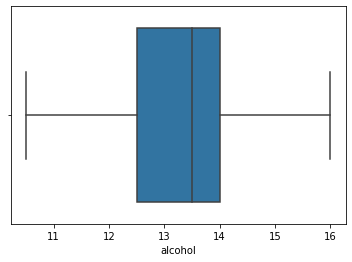

In [14]:
sns.boxplot(df.alcohol)

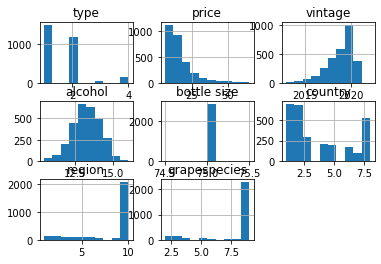

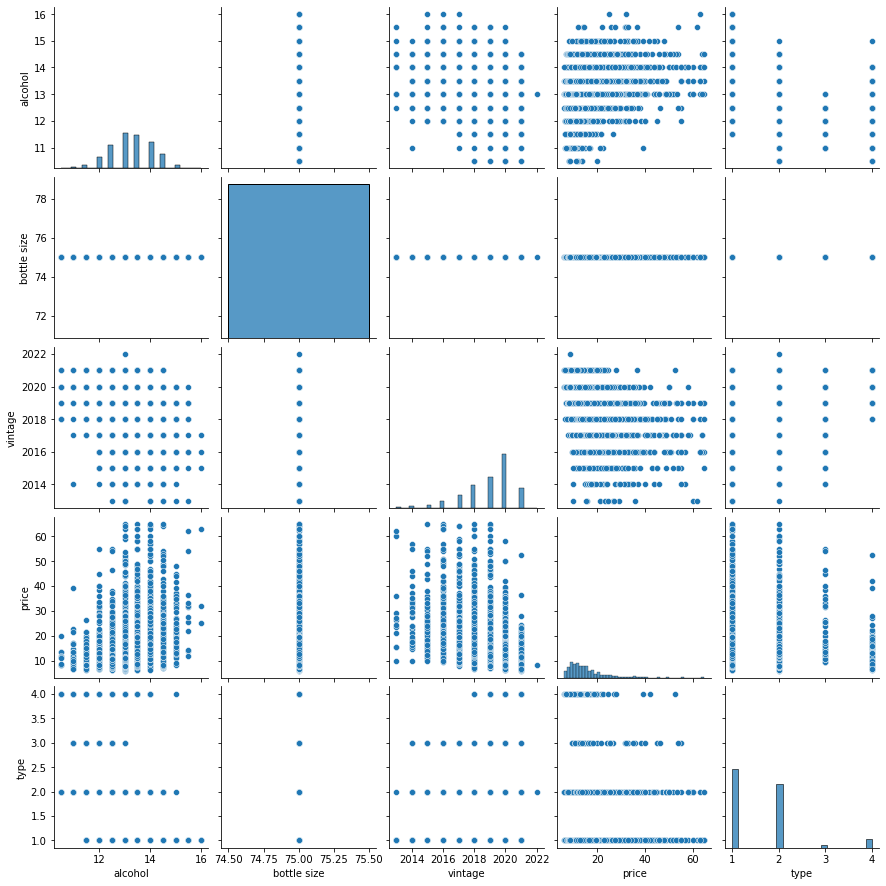

In [15]:
# simple hist using matplotlib
df.hist(bins=10)
plt.xlabel('alcohol')
plt.ylabel('price')
sns.pairplot(df[['alcohol', 'bottle size', 'vintage', 'price','type']])

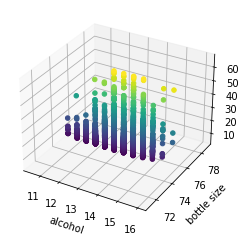

In [16]:
from mpl_toolkits.mplot3d import Axes3D
ax=plt.axes(projection='3d')
x = df['alcohol']
y= df['bottle size']
z=df['price']

plt.xlabel('alcohol')
plt.ylabel('bottle size')
ax.scatter3D(x,y,z, c=z, depthshade=False)